In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split


In [2]:
house_price = pd.read_csv(r"C:\Users\Administrator\Desktop\Boston house prediction\housing.csv")

In [3]:
house_price.head()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [5]:
# Defining column names
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
           'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Loading CSV 
house_price = pd.read_csv(
    r"C:\Users\Administrator\Desktop\Boston house prediction\housing.csv",
    delim_whitespace=True,  # <-- this is key
    header=None,
    names=columns
)

print(house_price.head())



      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6632\4180330690.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  house_price = pd.read_csv(


In [6]:
# Renaming MEDV(target) column to 'price'
house_price = house_price.rename(columns={'MEDV': 'price'})
print(house_price.head())


      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  price
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]


In [7]:
house_price.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [8]:
house_price.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

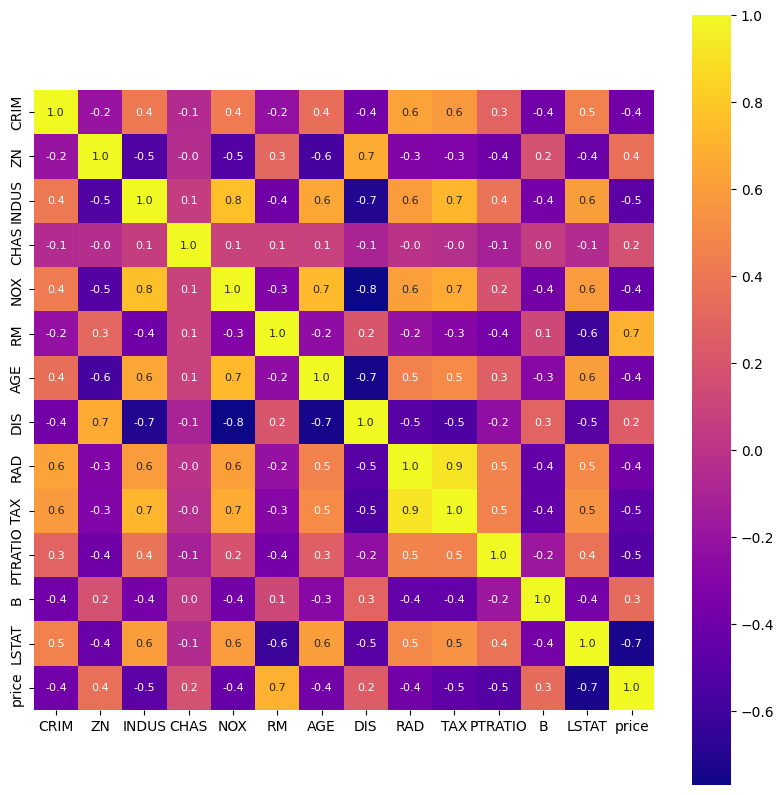

In [11]:
correlation = house_price.corr()
#Heatmap 
plt.figure(figsize=(10,10)) 
sns.heatmap(correlation, cbar=True, fmt='.1f', annot=True, annot_kws={"size":8}, square= True, cmap='plasma')

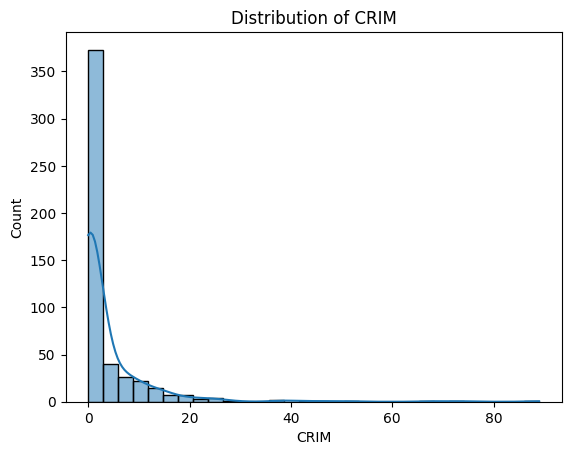

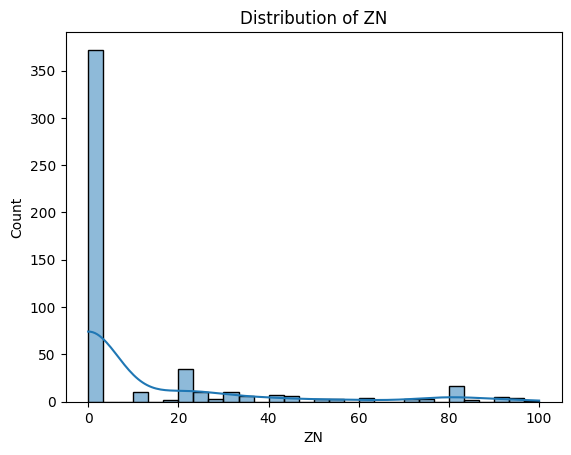

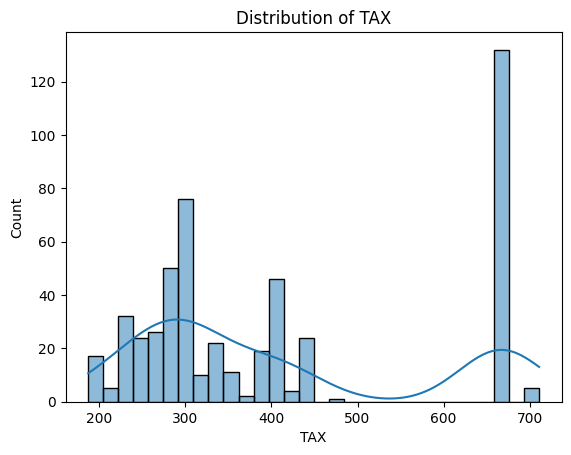

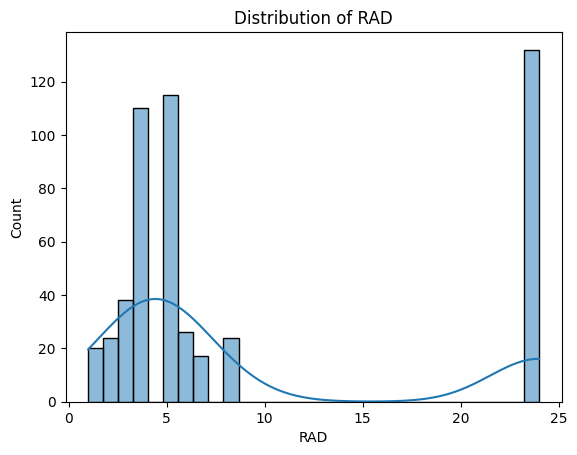

In [13]:
#Histogram of skewed features
skewed_features = ['CRIM', 'ZN', 'TAX', 'RAD']

for feature in skewed_features:
    plt.figure()
    sns.histplot(house_price[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()


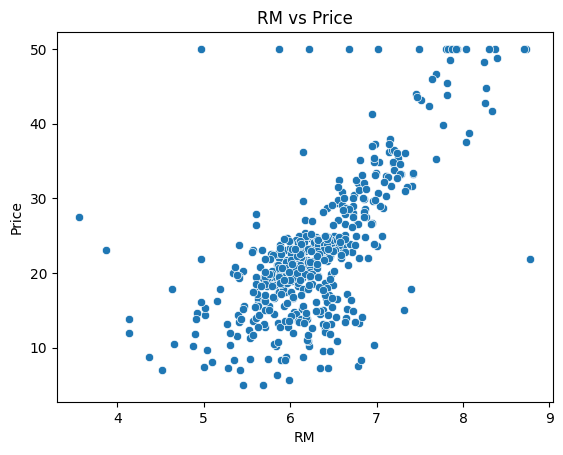

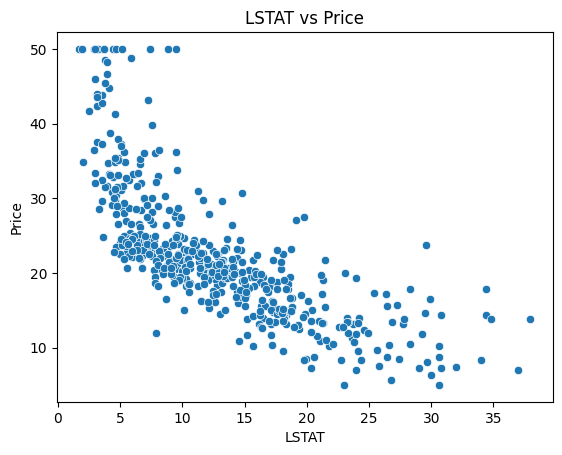

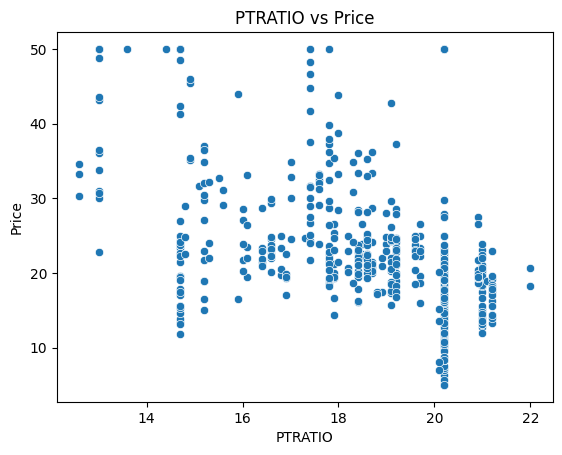

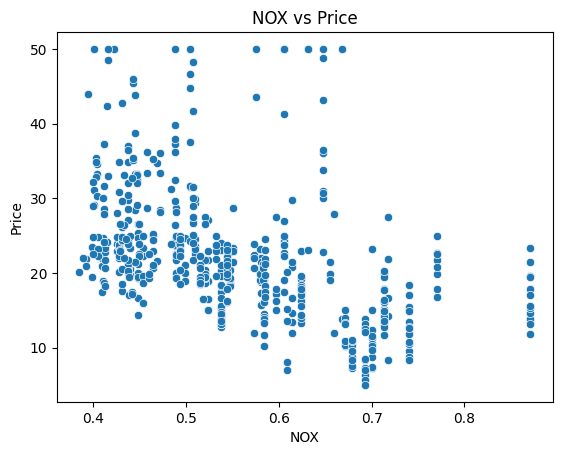

In [15]:
#Key features vs price
key_features = ['RM', 'LSTAT', 'PTRATIO', 'NOX']

for feature in key_features:
    plt.figure()
    sns.scatterplot(x=house_price[feature], y=house_price['price'])
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

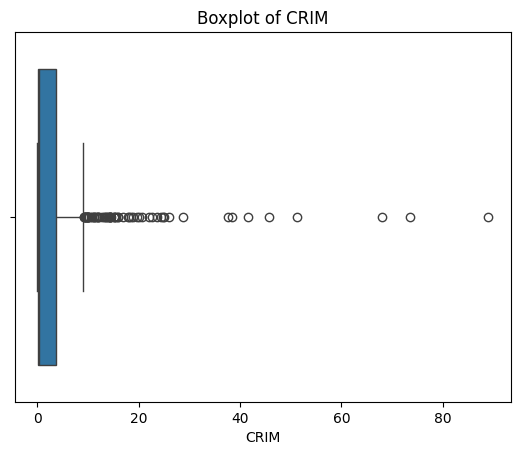

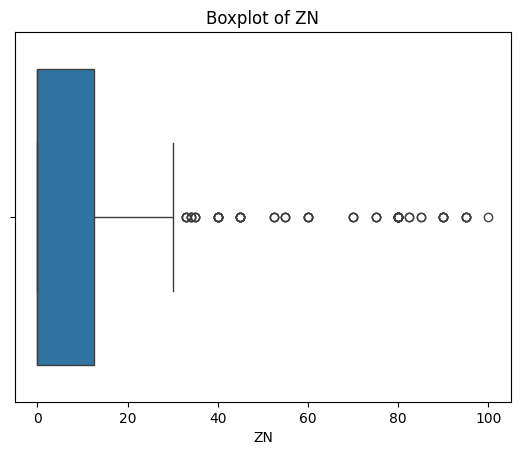

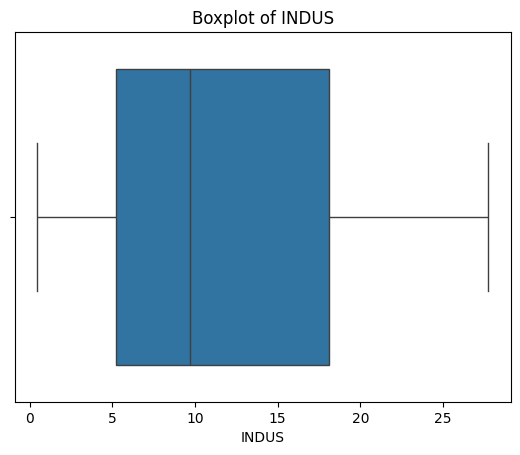

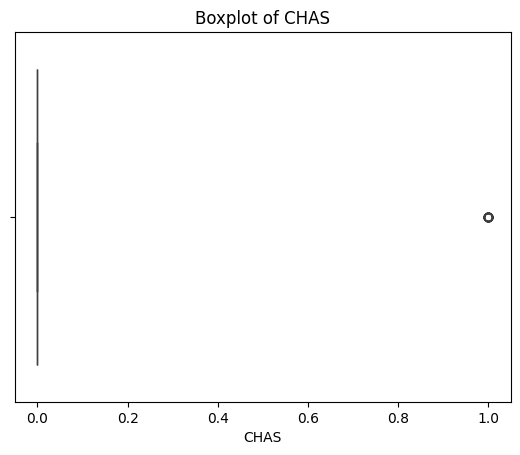

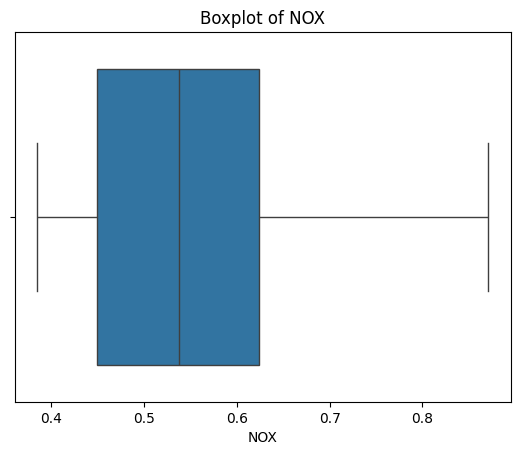

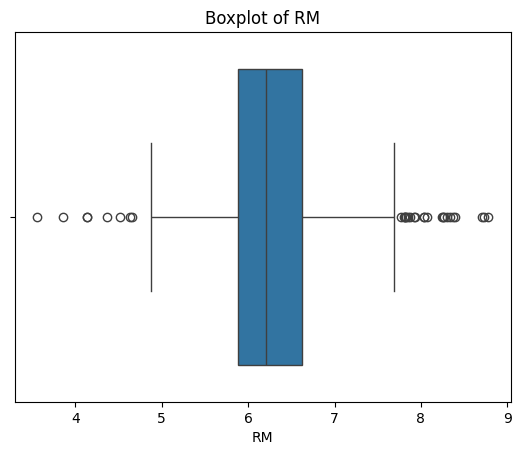

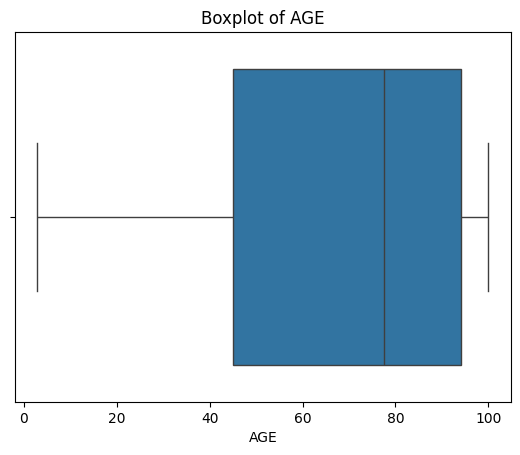

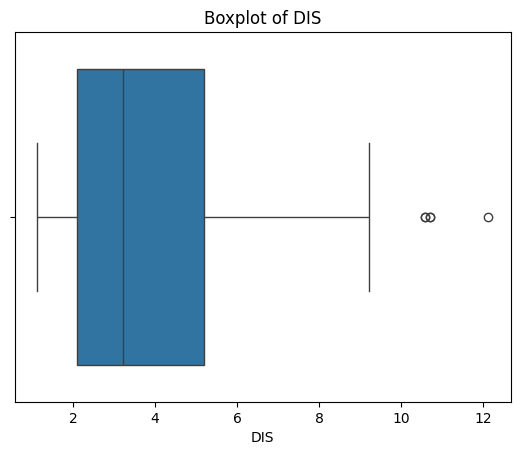

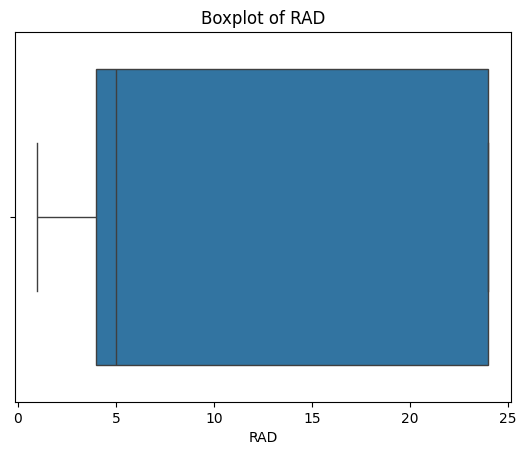

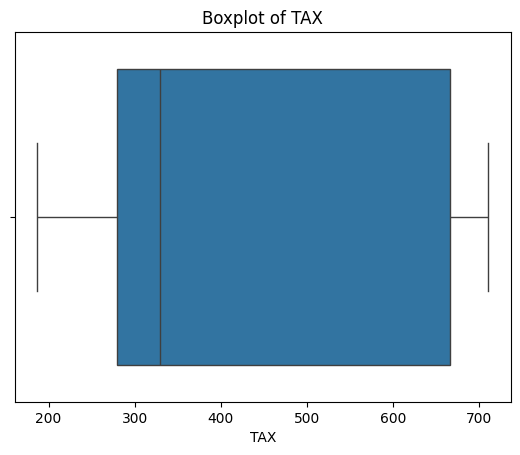

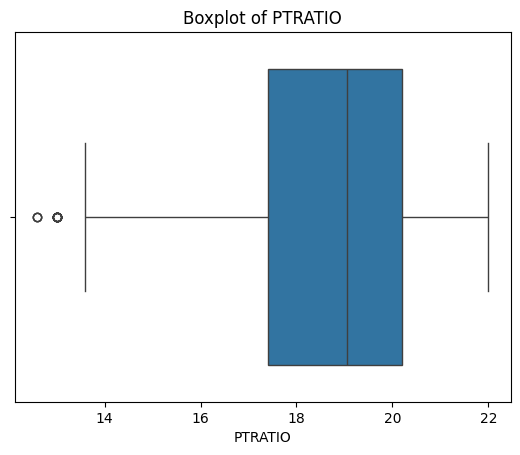

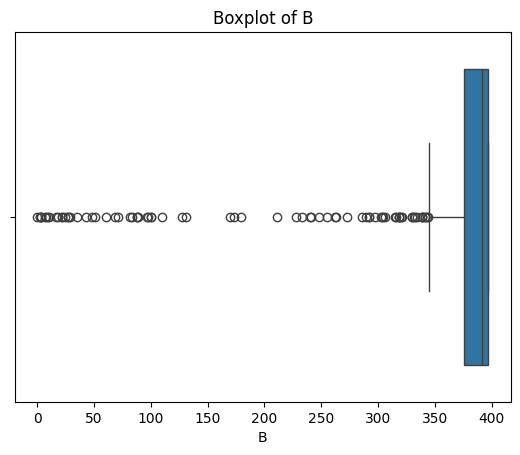

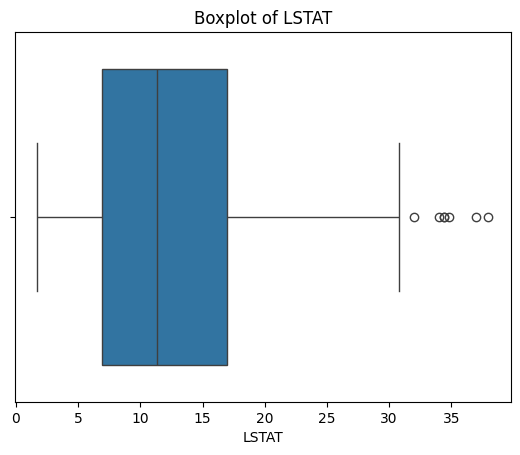

In [16]:
#Boxplot for Outliers
numeric_features = house_price.columns[:-1] 

for feature in numeric_features:
    plt.figure()
    sns.boxplot(x=house_price[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [19]:
features = ['RM', 'LSTAT']

for feature in features:
    X = house_price[[feature]].values 
    y = house_price['price'].values    
    
    model = LinearRegression()
    model.fit(X, y)
    
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    print(f"\nFeature: {feature}")
    print(f"Intercept: {model.intercept_:.3f}")
    print(f"Slope: {model.coef_[0]:.3f}")
    print(f"R²: {r2:.3f}")


Feature: RM
Intercept: -34.671
Slope: 9.102
R²: 0.484

Feature: LSTAT
Intercept: 34.554
Slope: -0.950
R²: 0.544


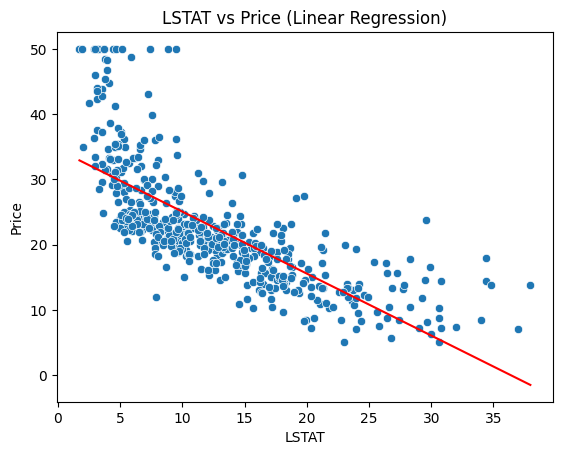

In [22]:
# Scatterplot + regression line
sns.scatterplot(x=house_price[feature], y=house_price['price'])
sns.lineplot(x=house_price[feature], y=y_pred, color='red')
plt.title(f"{feature} vs Price (Linear Regression)")
plt.xlabel(feature)
plt.ylabel("Price")
plt.show()

In [24]:
#Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = house_price.drop('price', axis=1)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by='VIF', ascending=False)


,Feature,VIF
10,PTRATIO,85.029547
5,RM,77.948283
4,NOX,73.894947
9,TAX,61.227274
6,AGE,21.386850
11,B,20.104943
8,RAD,15.167725
7,DIS,14.699652
2,INDUS,14.485758
12,LSTAT,11.102025


In [25]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

In [26]:
#Prepare Data
X = house_price.drop('price', axis=1)
y = house_price['price']

In [28]:
#Baseline Models with 5-Fold CV
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("\nBaseline Model Comparison (R²)")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"{name}: Mean R² = {scores.mean():.3f}, Std = {scores.std():.3f}")


Baseline Model Comparison (R²)
LinearRegression: Mean R² = 0.715, Std = 0.037
Ridge: Mean R² = 0.712, Std = 0.038
Lasso: Mean R² = 0.700, Std = 0.038
RandomForest: Mean R² = 0.871, Std = 0.033



=== RandomForest Feature Importances ===
LSTAT      0.450044
RM         0.362574
DIS        0.062982
CRIM       0.034634
NOX        0.021108
PTRATIO    0.016098
TAX        0.014828
AGE        0.014450
B          0.010778
INDUS      0.006308
RAD        0.003774
ZN         0.001534
CHAS       0.000888
dtype: float64


C:\Users\Administrator\AppData\Local\Temp\ipykernel_6632\888961307.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=importances.index, palette='viridis')


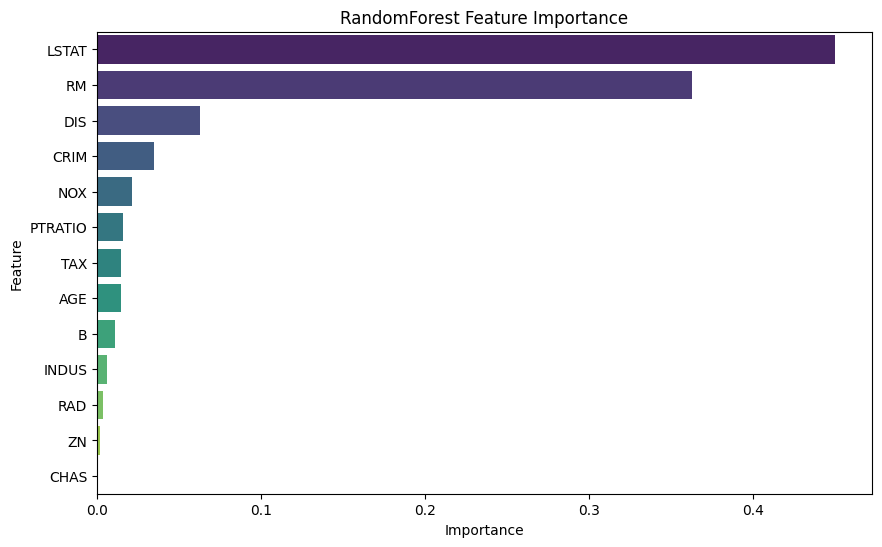

In [30]:
#Feature Importance (RandomForest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n=== RandomForest Feature Importances ===")
print(importances)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=importances.index, palette='viridis')
plt.title("RandomForest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [31]:
#L2
ridge = Ridge(alpha=10)  
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(ridge, X, y, cv=cv, scoring="r2")

print("Ridge R²:", np.mean(scores))


Ridge R²: 0.7069522946987021


In [32]:
#L1
lasso = Lasso(alpha=0.01)
scores = cross_val_score(lasso, X, y, cv=cv, scoring="r2")

print("Lasso R²:", np.mean(scores))

Lasso R²: 0.7164040954710897


In [33]:
#Tree model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
scores = cross_val_score(rf, X, y, cv=cv, scoring="r2")

print("Random Forest R²:", np.mean(scores))


Random Forest R²: 0.8741783694383427


In [34]:
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring="r2")
    print(f"{name} R²: {np.mean(scores):.4f}")


Ridge R²: 0.7070
Lasso R²: 0.7164
RandomForest R²: 0.8742


In [36]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],       
    'max_depth': [None, 10, 20, 30],       
    'min_samples_split': [2, 5, 10],    
    'min_samples_leaf': [1, 2, 4],       
    'max_features': ['auto', 'sqrt', 'log2']  
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# GridSearch with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=1,
    verbose=2
)

# Fit to the data
grid_search.fit(X, y)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R² Score:", grid_search.best_score_)

# Best model
rf_best = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=

c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² Score: 0.6305721261421933


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [39]:
from sklearn.ensemble import RandomForestRegressor

best_rf = RandomForestRegressor(
    max_depth=20,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
#Evaluation
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_pred = best_rf.predict(X_test)

# Metrics
print("Test R²:", r2_score(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))



Test R²: 0.8632937115365122
Test RMSE: 3.1662579356132645


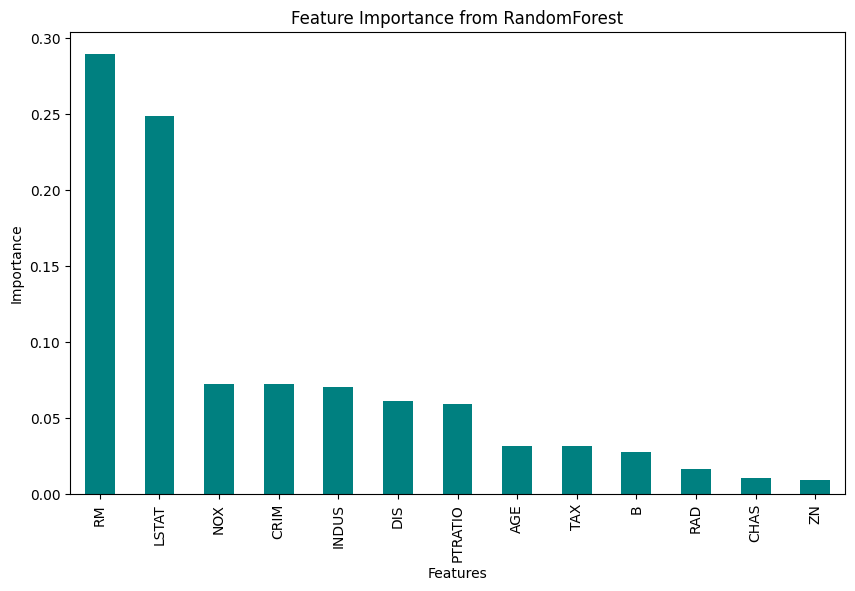

In [42]:
# Feature importance
importances = best_rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar', color='teal')
plt.title("Feature Importance from RandomForest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

In [43]:
#Compare models on test data
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.01),
    "RandomForest": best_rf
}

print("Model Performance on Test Data:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} → R²: {r2:.4f}, RMSE: {rmse:.4f}")

Model Performance on Test Data:

Ridge → R²: 0.6639, RMSE: 4.9647
Lasso → R²: 0.6686, RMSE: 4.9298
RandomForest → R²: 0.8633, RMSE: 3.1663


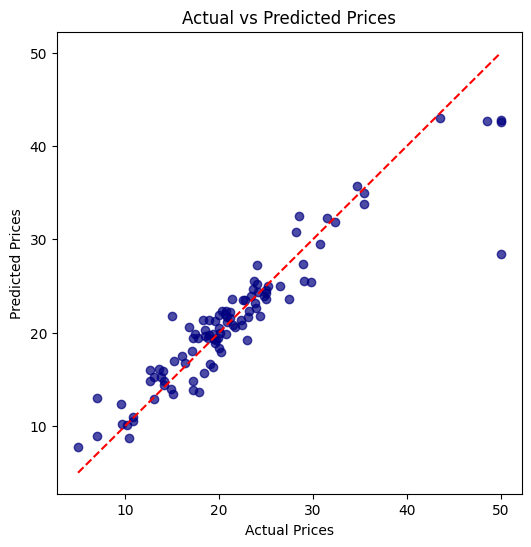

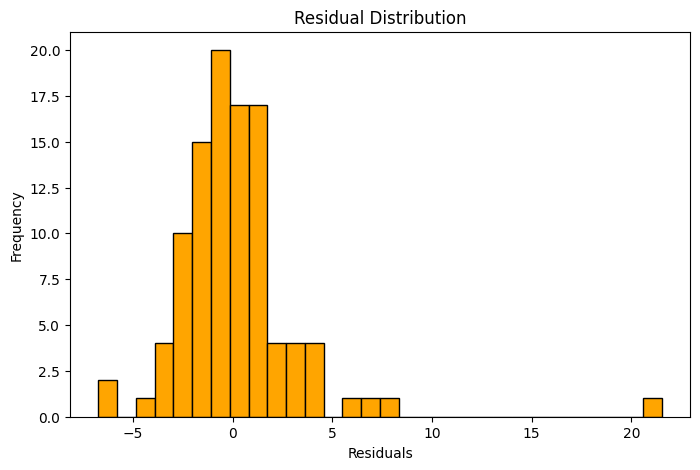

In [44]:
#best model's predictions
y_pred = best_rf.predict(X_test)

# Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="navy")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linestyle="--")  # perfect fit line
plt.show()

# Residual distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=30, color="orange", edgecolor="black")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


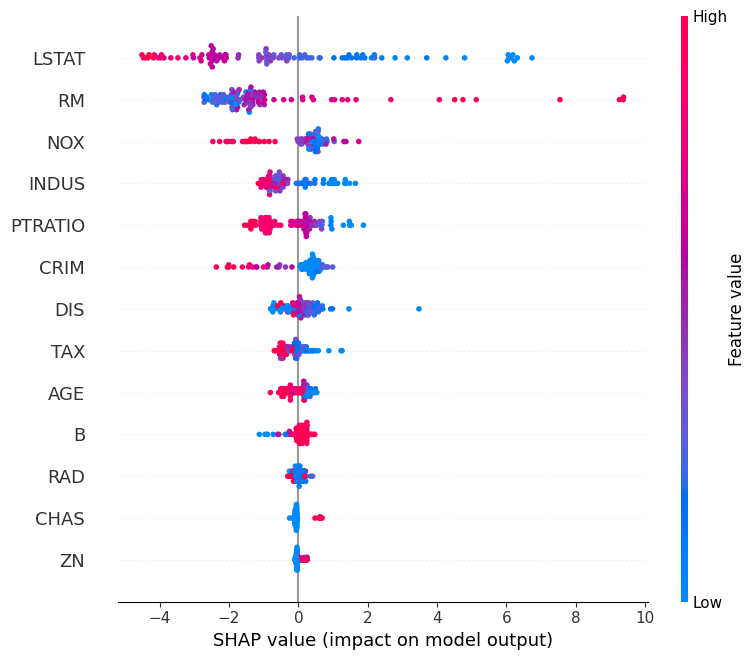

In [45]:
import shap

explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [50]:
import joblib
joblib.dump(best_rf, "best_rf_model1.pkl")


['best_rf_model1.pkl']

In [51]:
#Prediction function
def predict_price(model, features):
    return model.predict([features])[0]

example = X_test.iloc[0].values
print("Predicted Price:", predict_price(best_rf, example))


Predicted Price: 24.65085714285712


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [52]:
model = joblib.load("best_rf_model1.pkl")


In [53]:
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
results.to_csv("predictions.csv", index=False)
